In [14]:
import sys
import skimage.io as skio
import skimage as sk
import skimage.transform as transform
from skimage.measure import find_contours
import numpy as np
ros_path = '/opt/ros/kinetic/lib/python2.7/dist-packages'
if ros_path in sys.path:
    sys.path.remove(ros_path)
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages')
import matplotlib.pyplot as plt

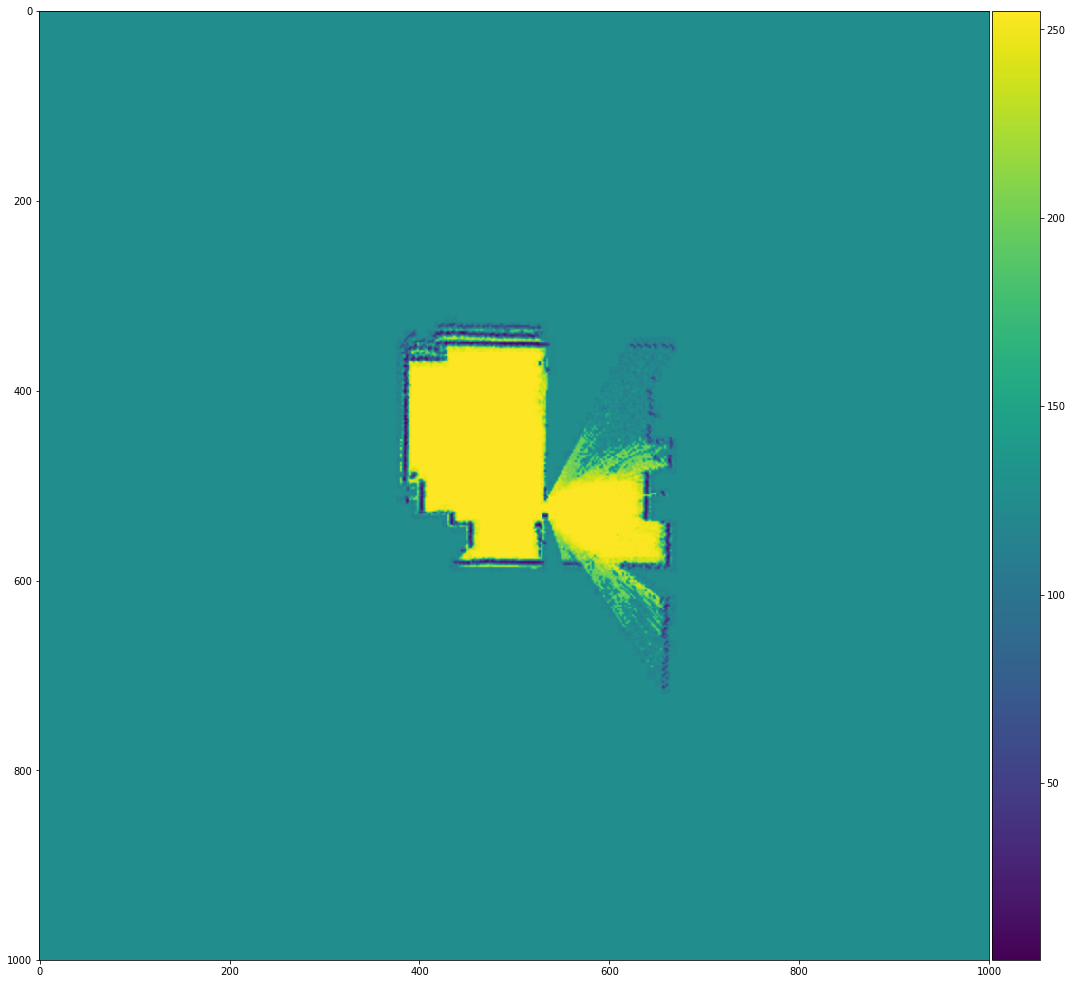

In [19]:
a = skio.imread("slam-master-jason/run1.jpg")
a = a[::-1]
size = a.shape
plt.figure(figsize = (15,15))
a = sk.measure.block_reduce(a, (2,2), np.min)
a = transform.resize(a, size, preserve_range=True)
skio.imshow(a)

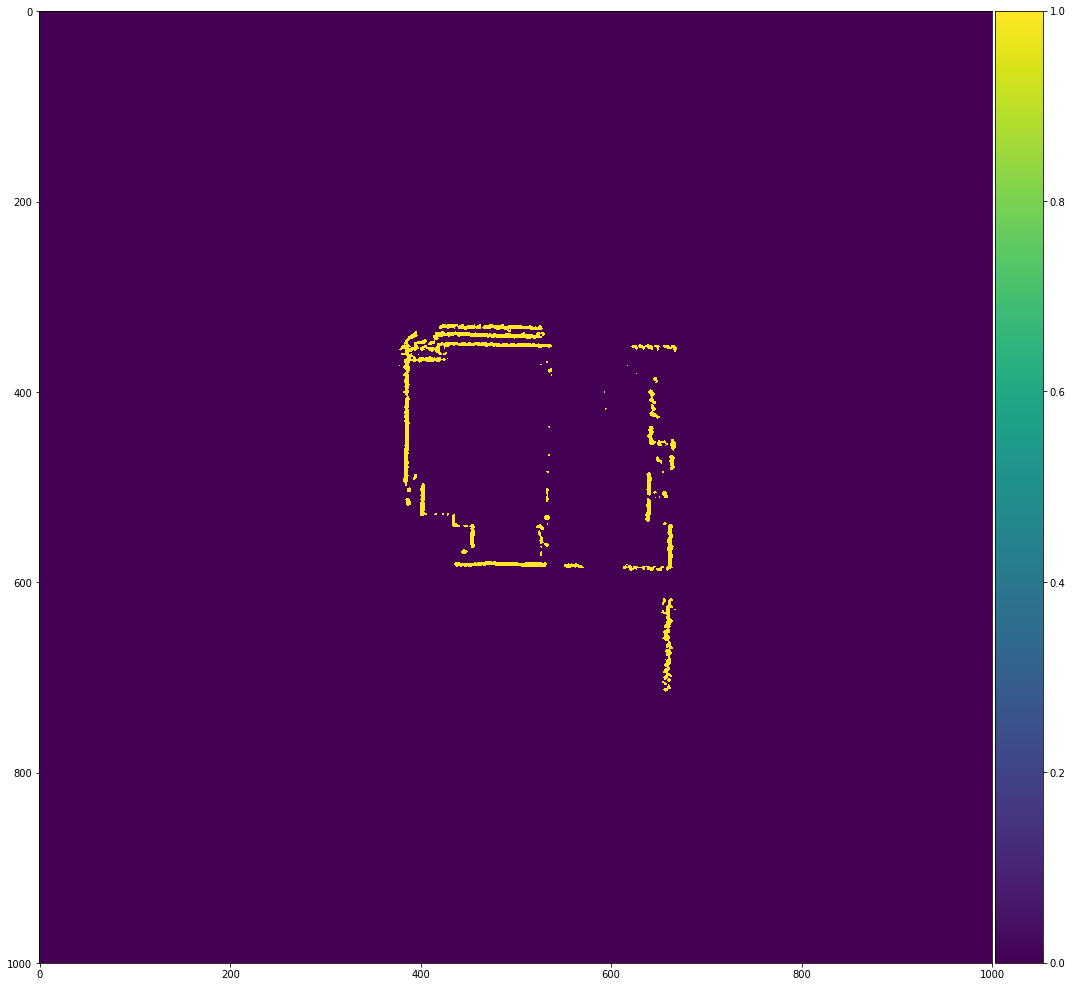

In [16]:
def obstacle_map(gridmap):
    copy = np.copy(gridmap)
    copy[copy == 127] = 255
    return copy < 105

def obstacle_indeices(obstacle_map):
    return np.nonzero(obstacle_map)

def show_obstacle(gridmap):
    black = np.zeros(gridmap.shape)
    black[obstacle_map(gridmap)] = 255
    return black
plt.figure(figsize = (15,15))
skio.imshow(obstacle_map(a))

In [316]:
# np.unique(a.reshape((40000, 1)))

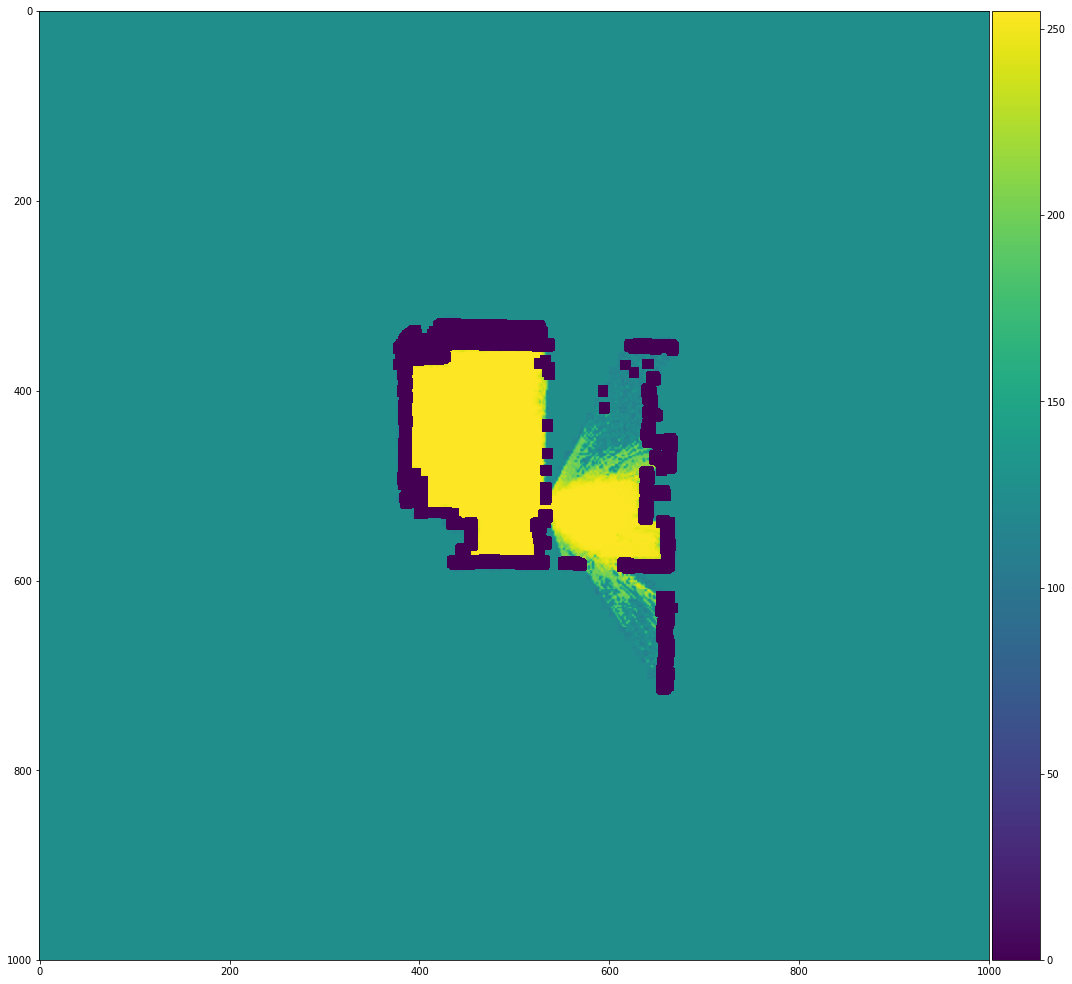

In [17]:
def grow_obstacle(gridmap):
    ob_map = obstacle_map(gridmap)
    copy = np.copy(gridmap)
    mask = np.copy(ob_map)
    step = 5
    for dx in range(-step, step+1):
        for dy in range(-step, step+1):
            roll = np.roll(np.roll(ob_map, dx, axis = 0), dy, axis = 1)
            mask = np.logical_or(roll, mask)
    copy[mask] = 0
            
    return copy
plt.figure(figsize=(15,15))
skio.imshow(grow_obstacle(a))

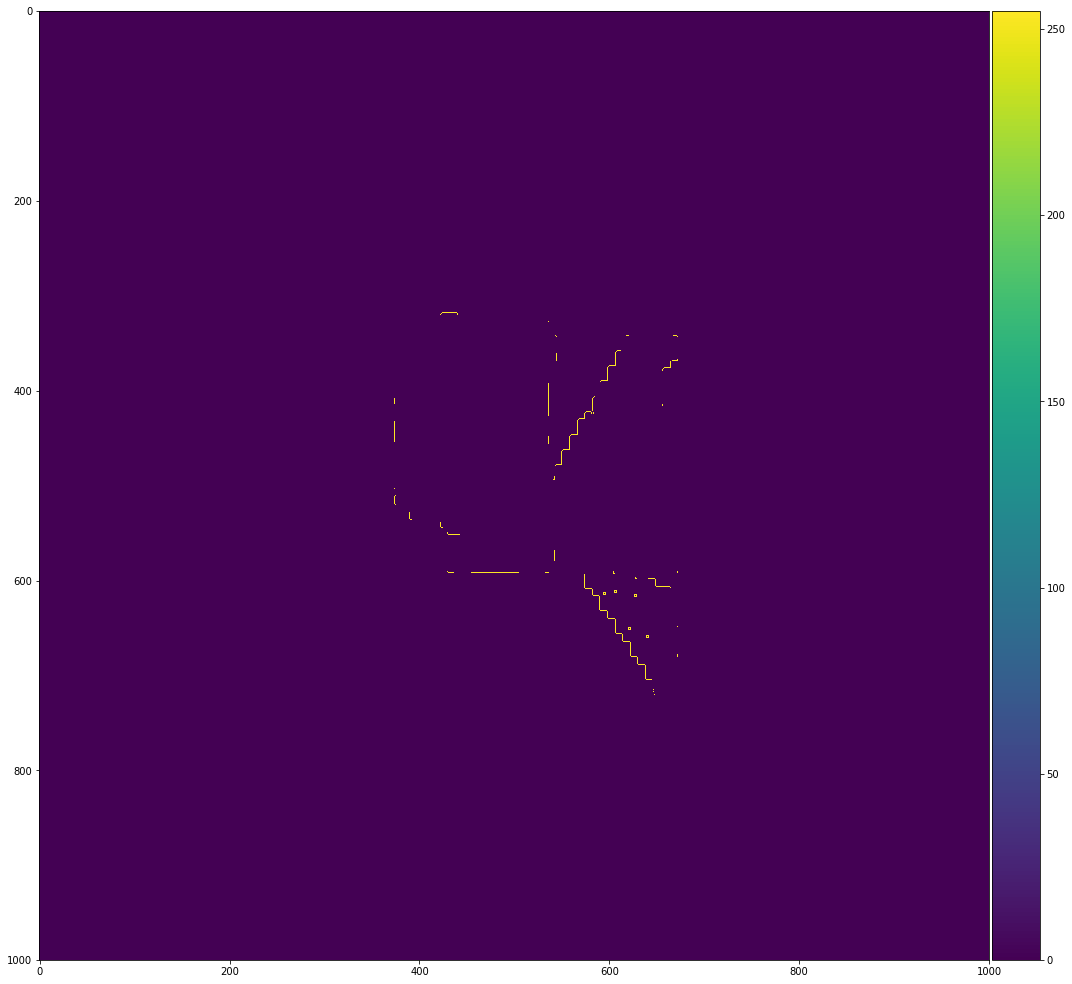

In [5]:
def frontier(gridmap):
    growed = grow_obstacle(gridmap)
    gray = growed == 127
    black = growed ==0
    white = np.logical_not(np.logical_or(gray, black))
    level_map = white*255+gray*127
    canny = cv2.Canny(level_map.astype(np.uint8), 1, 1)
    
    xs, ys = np.nonzero(canny)
    trued = np.copy(canny)
    for i in range(len(xs)):
        x, y = xs[i], ys[i]
        if x > 0 and x< gridmap.shape[0]:
            if y > 0 and y< gridmap.shape[1]:
                blackarea = black[x-4:x+5,y-4:y+5]
                blackave = np.mean(blackarea)
                
                whitearea = white[x-2:x+3,y-2:y+3]
                whiteave = np.mean(whitearea)
                if not blackave <0.1:
                    trued[x][y] = 0
                if not whiteave > 0.3:
                    trued[x][y] = 0
                
    return trued
plt.figure(figsize=(15, 15))
skio.imshow(frontier(a))

No handles with labels found to put in legend.


[20, 21, 22, 23, 24, 30, 155, 158, 355, 356, 413, 414, 415, 416, 417, 418, 419, 420, 559, 618, 620, 628, 664, 665, 666]


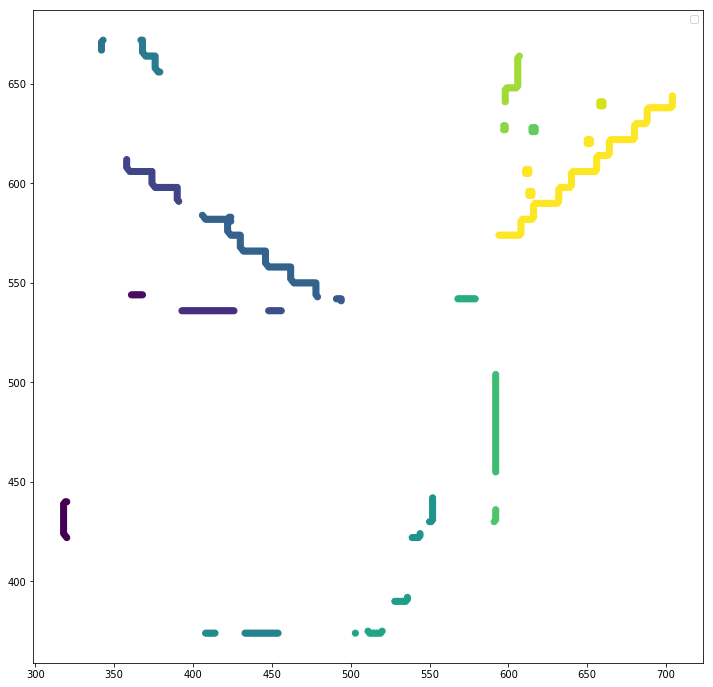

In [11]:
import scipy.cluster.hierarchy as hcluster
fro = frontier(a)
cordinates = np.array(np.nonzero(fro))

cordinates = np.transpose(cordinates)
clusters = hcluster.fclusterdata(cordinates, 10, criterion="distance")

group_id, group_count = np.unique(clusters, return_counts=True)
for i in group_id:
    if group_count[i - 1] < 5:
        clusters[clusters == i] = -5

filter_lst = []
for i in range(len(clusters)):
    if clusters[i] == -5:
        filter_lst.append(i)

clusters = np.delete(clusters, filter_lst)
cordinates = np.delete(cordinates, filter_lst, axis=0)
cx, cy = np.transpose(cordinates)
print(filter_lst)

plt.figure(figsize=(12, 12))
plt.scatter(*np.transpose(cordinates), c=clusters)
plt.legend()

0
False
nan


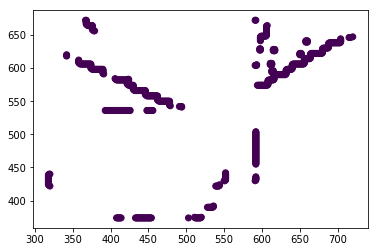

In [131]:
ccopy = np.copy(clusters)
ccopy[ccopy != 2] = 0
ones = np.nonzero(ccopy)
print(ones[0].size)
print(np.mean(cx[ones]) == np.nan)
print(np.mean(cy[ones]))
plt.scatter(*np.transpose(cordinates), c=ccopy)

In [3]:
sys.path.append('/home/daly/vrep_ws/slam-master-jason')
from lib.frontier import *

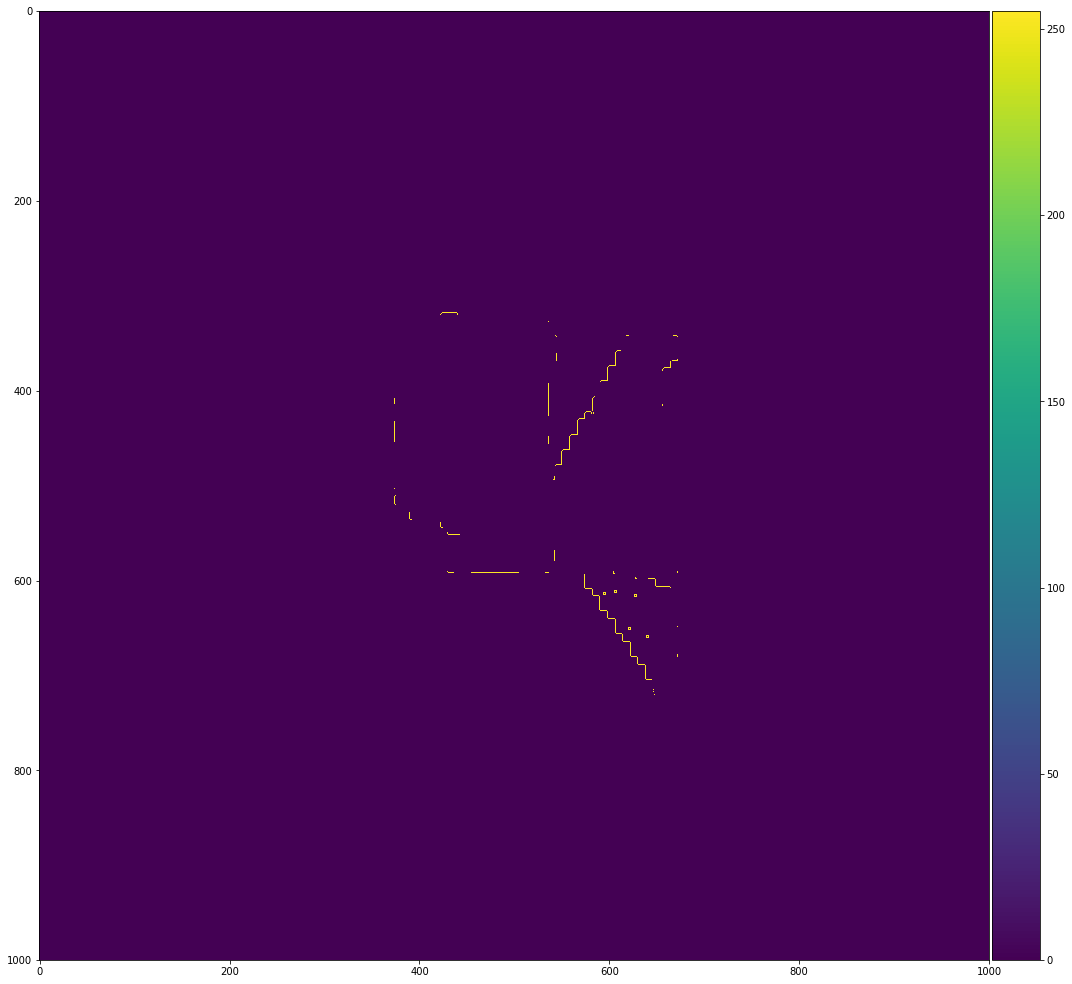

In [9]:
b = skio.imread("slam-master-jason/run1.jpg")
b = b[::-1]
#testx, testy, cl = frontier_cluster(b)
plt.figure(figsize=(15, 15))
#b = sk.measure.block_reduce(a, (2,2), np.min)
#b = transform.resize(a, size, preserve_range=True)
b = preprocess_grid(b)
skio.imshow(frontier(b))

In [2]:
sys.path.append('/home/daly/vrep_ws/slam-master-jason')
from lib.pathplanner import lee_planning_path

[[ 10  20  30   0 100]
 [  0  10  40  50  10]
 [  0  20  50   0 100]
 [ 10  50  60  70  80]]
[[ 0.  1.  2. -1.  6.]
 [-1.  2.  3.  4.  5.]
 [-1.  3.  4. -1.  6.]
 [ 5.  4.  5.  6.  7.]]
[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]
[(0, 2), (1, 2), (1, 4), (3, 4)]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[(650, 450), (650, 451), (650, 452), (650, 453), (650, 454), (650, 455), (650, 456), (650, 457), (650, 458), (650, 459), (650, 460), (650, 461), (650, 462), (650, 463), (650, 464), (650, 465), (650, 466), (650, 467), (650, 468), (650, 469), (650, 470), (650, 471), (650, 472), (650, 473), (650, 474), (650, 475), (650, 476), (650, 477), (650, 478), (650, 479), (650, 480), (650, 481), (650, 482), (650, 483), (650, 484), (650, 485), (650, 486), (650, 487), (650, 488), (650, 489), (650, 490), (650, 491), (650, 492), (650, 493), (650, 494), (650, 495), (650, 496), (650, 497), (650, 498), (650, 499), (650, 500), (650, 501), (650, 502), (650, 503), (650, 504), (650, 505), (650, 506), (650, 507), (650, 508), (650, 509), (650, 510), (650, 511), (650, 512), (650, 513), (650, 514), (650, 515), (650, 516), (650, 517), (650, 518), (650, 519), (65

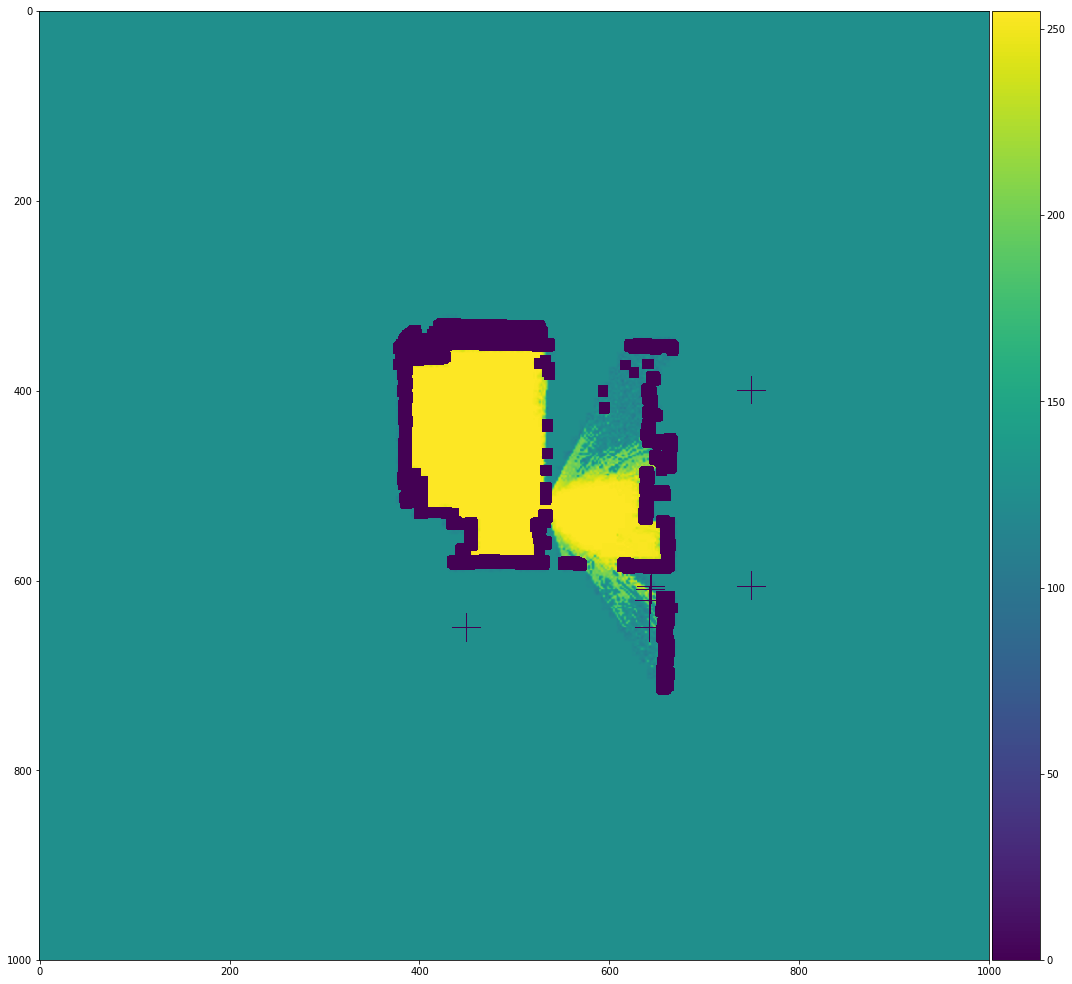

In [13]:
def color_wp(grid, wp, c):
    for i in range(wp[0]-15, wp[0]+15):
        grid[i][wp[1]] = c
    for i in range(wp[1]-15, wp[1]+15):
        grid[wp[0]][i] = c
    return grid

a = skio.imread("slam-master-jason/run1.jpg")
a = a[::-1]
b = a.copy()
size = b.shape
b = sk.measure.block_reduce(a, (2,2), np.min)
b = transform.resize(b, size, preserve_range=True)
obst_b = grow_obstacle(b)
double_obst_b = grow_obstacle(obst_b)
import time
tstart = time.time()
wps = lee_planning_path(double_obst_b, (650, 450), (400, 750))
tend = time.time()
print(tend - tstart)
obst_b = color_wp(obst_b, (650, 450), 0.6)
obst_b = color_wp(obst_b, (400, 750), 0.8)
for wp in wps:
    obst_b = color_wp(obst_b, wp, 0.8)
plt.figure(figsize=(15, 15))
skio.imshow(obst_b)